# Right Left Center game analysis
Right Left Center is a game consisting of n players each starting with three tokens.  Each player in turn rolls one, two, or three dice, each die with sides star, left, right, and three dots.  For each star, the player loses a token to the center; for each left, the player loses a token to the player on the left; for each right, the player loses a token to the player on the right.  A dot is the best side for a player, as it does not force a player to lose any tokens.  When a player has three or more tokens, the players rolls three dice.  When the player has zero, one, or two dice, the player rolls zero, one, or two dice.  The game is over when only one player has tokens, and that player is the winner.

## Define a die and a roll function

In [136]:
import random

D = 'o'
S = '*'
L = 'left'
R = 'right'
die = [D,D,D,S,L,R]
def get_roll(n_dice):
    return [die[random.randint(0,5)] for _ in range(n_dice)]

get_roll(3)

['right', 'right', 'o']

## Detect end of game and the winner

In [137]:
from collections import Counter
def game_over(tokens):
    """
    game is over when only one player has tokens left
    """
    token_counts = Counter(tokens)
    return token_counts[0] == len(tokens)-1
game_over([0,3,0])

True

In [138]:
def get_winner(tokens):
    if game_over(tokens):
        for i,v in enumerate(tokens):
            if v>0:
                return i
    else:
        return -1
get_winner([0,2,0,0])

1

## Simulate a game

In [139]:
def play(n_players=3,verbose=False):
    active_player = -1
    turn = 0
    tokens = [3]*n_players

    while not game_over(tokens):
        turn += 1
        active_player=(active_player+1)%n_players
        # roll dice according to number of tokens
        roll = get_roll(min(3,tokens[active_player]))
        for d in roll:
            if d == D:
                pass
            elif d == S:
                # token goes into the center
                tokens[active_player]-=1
            elif d == L:
                # player gives token to player on left
                tokens[active_player]-=1
                tokens[(active_player-1)%n_players]+=1
            elif d == R:
                # player gives token to player on right
                tokens[active_player]-=1
                tokens[(active_player+1)%n_players]+=1
        if verbose: print(f'{turn}: player {active_player} rolls {roll} --> {tokens}')
    if verbose:print(f'{n_players} players, {turn} turns')
    return turn, get_winner(tokens), tokens
play(n_players=3,verbose=True)

1: player 0 rolls ['o', 'right', 'o'] --> [2, 4, 3]
2: player 1 rolls ['left', 'o', 'o'] --> [3, 3, 3]
3: player 2 rolls ['*', 'right', 'o'] --> [4, 3, 1]
4: player 0 rolls ['o', 'o', '*'] --> [3, 3, 1]
5: player 1 rolls ['o', 'o', 'o'] --> [3, 3, 1]
6: player 2 rolls ['o'] --> [3, 3, 1]
7: player 0 rolls ['o', 'o', '*'] --> [2, 3, 1]
8: player 1 rolls ['o', 'o', 'right'] --> [2, 2, 2]
9: player 2 rolls ['o', 'o'] --> [2, 2, 2]
10: player 0 rolls ['*', 'left'] --> [0, 2, 3]
11: player 1 rolls ['left', 'o'] --> [1, 1, 3]
12: player 2 rolls ['o', 'o', 'left'] --> [1, 2, 2]
13: player 0 rolls ['*'] --> [0, 2, 2]
14: player 1 rolls ['o', 'o'] --> [0, 2, 2]
15: player 2 rolls ['left', 'o'] --> [0, 3, 1]
16: player 0 rolls [] --> [0, 3, 1]
17: player 1 rolls ['right', 'o', 'right'] --> [0, 1, 3]
18: player 2 rolls ['o', 'right', 'right'] --> [2, 1, 1]
19: player 0 rolls ['o', 'right'] --> [1, 2, 1]
20: player 1 rolls ['o', 'left'] --> [2, 1, 1]
21: player 2 rolls ['right'] --> [3, 1, 0]
22: 

(25, 1, [0, 3, 0])

## Run multiple game simulation

In [140]:
%%time
n_games = int(1e4)
n_players = 4
t = []
w = []
k = []
for _ in range(n_games):
    turns, winner, tokens = play(n_players=n_players)
    t.append(turns)
    w.append(winner)
    k.append(tokens)

CPU times: user 2.46 s, sys: 9.37 ms, total: 2.47 s
Wall time: 2.47 s


## Basic analysis

In [141]:
from statistics import mean
mean_turns = mean(t)
ending_tokens = [sum(l) for l in k]
print(f'mean number of turns: {mean_turns}')
print(f'mean turns per player: {mean_turns/n_players}')
print(f'winner distribution: {Counter(w)}')
print(f'mean ending number of tokens: {mean(ending_tokens)} ({mean(ending_tokens)/(n_players*3)})')

mean number of turns: 34.0316
mean turns per player: 8.5079
winner distribution: Counter({3: 2633, 2: 2560, 0: 2463, 1: 2344})
mean ending number of tokens: 2.0452 (0.17043333333333333)


## Analyze number of winner's tokens

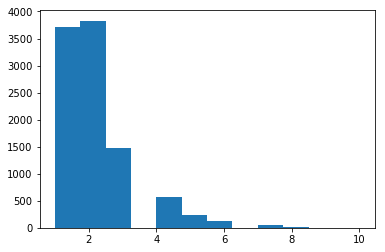

Counter({2: 3829, 1: 3709, 3: 1468, 4: 565, 5: 245, 6: 120, 7: 43, 8: 15, 9: 5, 10: 1})


In [142]:
import matplotlib.pyplot as plt
plt.hist(ending_tokens,bins=3*n_players)
plt.figure(figsize=(20,6))
plt.show()
print(Counter(ending_tokens))

## Analyze number of turns in the game

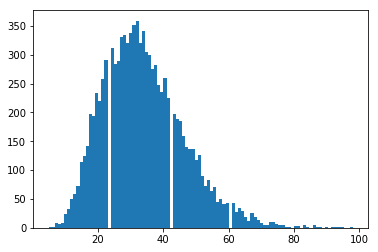

In [148]:
import matplotlib.pyplot as plt
plt.hist(t,bins=max(t))
plt.figure(figsize=(20,6))
plt.show()

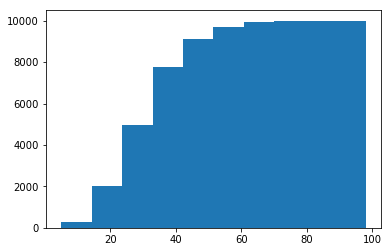

In [144]:
import matplotlib.pyplot as plt
plt.hist(t,cumulative=1)
plt.figure(figsize=(20,6))
plt.show()

In [145]:
turn_counts = Counter(t)
turn_counts

Counter({5: 1,
         6: 2,
         7: 8,
         8: 6,
         9: 8,
         10: 24,
         11: 33,
         12: 50,
         13: 59,
         14: 73,
         15: 114,
         16: 125,
         17: 141,
         18: 198,
         19: 193,
         20: 234,
         21: 220,
         22: 258,
         23: 291,
         24: 311,
         25: 284,
         26: 290,
         27: 330,
         28: 335,
         29: 321,
         30: 338,
         31: 352,
         32: 359,
         33: 320,
         34: 342,
         35: 304,
         36: 299,
         37: 275,
         38: 283,
         39: 247,
         40: 236,
         41: 260,
         42: 225,
         43: 198,
         44: 188,
         45: 186,
         46: 159,
         47: 140,
         48: 136,
         49: 136,
         50: 118,
         51: 126,
         52: 90,
         53: 73,
         54: 82,
         55: 64,
         56: 71,
         57: 45,
         58: 50,
         59: 42,
         60: 43,
         61: 43,
    

## Analyze distribution of winners

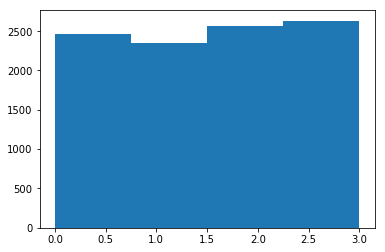

In [146]:
plt.hist(w,bins=n_players)
plt.figure(figsize=(20,6))
plt.show()

In [147]:
winner_counts = Counter(w)
winner_counts

Counter({0: 2463, 1: 2344, 2: 2560, 3: 2633})